# CNN Hyperparameter Evaluation - MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [2]:
def build_cnn_model(filters, kernel_size, use_dropout, dense_units):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if use_dropout:
        model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    if use_dropout:
        model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [3]:
results = {}
histories = {}
params_list = []

for filters, kernel_size, use_dropout, dense_units_val in [(32, 3, False, 128), (32, 3, True, 128), (32, 5, False, 128), (32, 5, True, 128), (64, 3, False, 128), (64, 3, True, 128), (64, 5, False, 128), (64, 5, True, 128)]:
    name = f"F{filters}_K{kernel_size}_{'DO' if use_dropout else 'noDO'}_D{dense_units_val}"
    print(f"Training {name}")
    model = build_cnn_model(filters, kernel_size, use_dropout, dense_units_val)
    history = model.fit(x_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=128, verbose=0)
    results[name] = model.evaluate(x_test, y_test_cat, verbose=0)
    histories[name] = history
    params_list.append((name, filters, kernel_size, use_dropout, dense_units_val))


Training F32_K3_noDO_D128


C:\Users\natha\anaconda3\envs\ARN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training F32_K3_DO_D128
Training F32_K5_noDO_D128
Training F32_K5_DO_D128
Training F64_K3_noDO_D128
Training F64_K3_DO_D128
Training F64_K5_noDO_D128
Training F64_K5_DO_D128


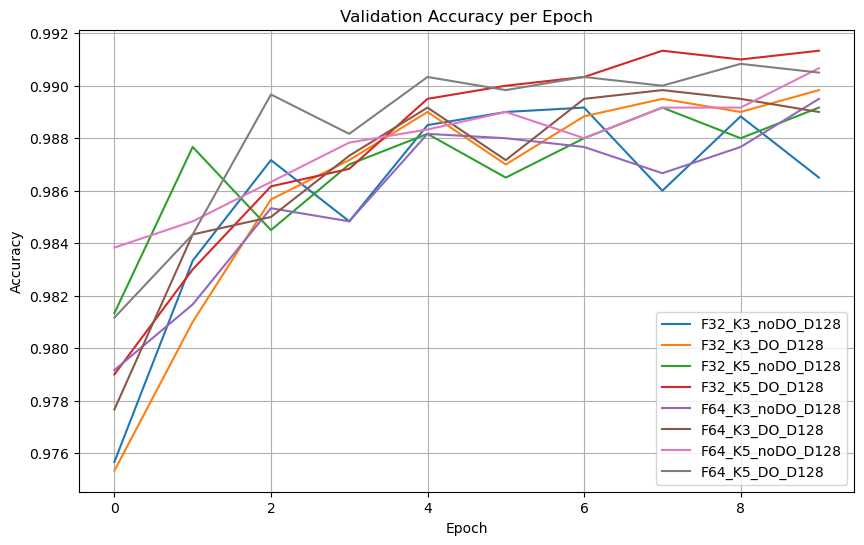

In [4]:
plt.figure(figsize=(10, 6))
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
for name, res in results.items():
    print(f"{name}: Test Loss = {res[0]:.4f}, Test Accuracy = {res[1]*100:.2f}%")


F32_K3_noDO_D128: Test Loss = 0.0616, Test Accuracy = 98.25%
F32_K3_DO_D128: Test Loss = 0.0415, Test Accuracy = 98.78%
F32_K5_noDO_D128: Test Loss = 0.0396, Test Accuracy = 98.90%
F32_K5_DO_D128: Test Loss = 0.0311, Test Accuracy = 99.05%
F64_K3_noDO_D128: Test Loss = 0.0421, Test Accuracy = 98.76%
F64_K3_DO_D128: Test Loss = 0.0402, Test Accuracy = 98.76%
F64_K5_noDO_D128: Test Loss = 0.0380, Test Accuracy = 98.93%
F64_K5_DO_D128: Test Loss = 0.0342, Test Accuracy = 98.88%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


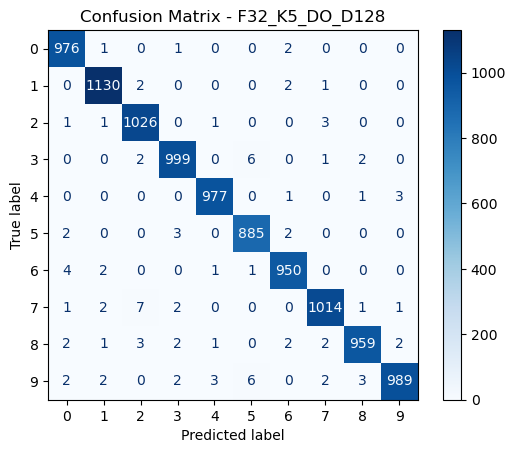

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Récupérer le meilleur modèle
best_model = histories["F32_K5_DO_D128"].model
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - F32_K5_DO_D128")
plt.show()
